In [6]:
import pandas as pd

file_path = 'imbalanced_infectious_disease_dataset.xlsx'
your_dataset = pd.read_excel(file_path)

# Get the number of rows and columns
num_rows, num_columns = your_dataset.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print(f"Size of the dataset: {num_rows * num_columns}")


Number of rows: 500000
Number of columns: 23
Size of the dataset: 11500000


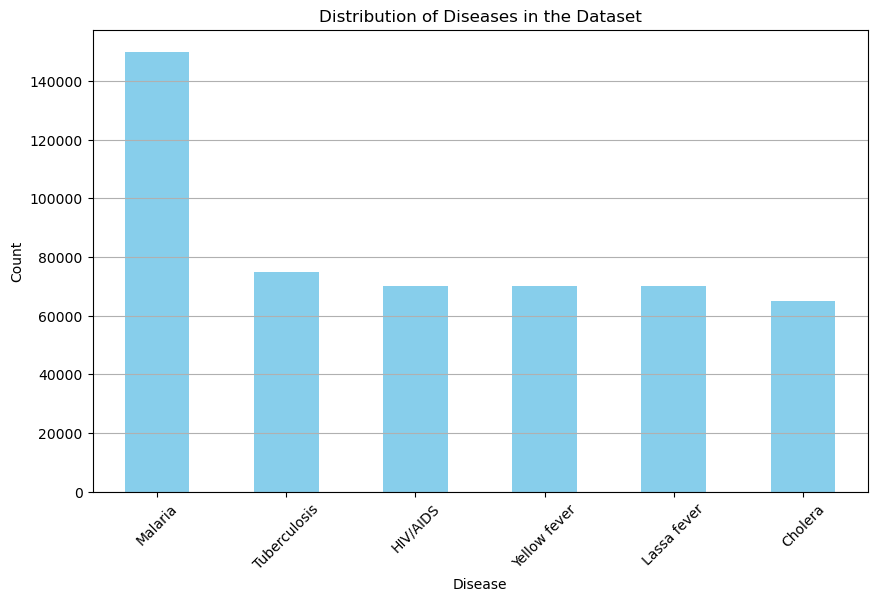

Malaria         150000
Tuberculosis     75000
HIV/AIDS         70000
Yellow fever     70000
Lassa fever      70000
Cholera          65000
Name: Disease, dtype: int64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = 'imbalanced_infectious_disease_dataset.xlsx'
df = pd.read_excel(file_path)
# Generate value counts for the Disease column
disease_counts = df['Disease'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
disease_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Diseases in the Dataset')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Save the plot as an image file
plt.savefig('disease_distribution.png')

# Display the plot
plt.show()

# Display the value counts
print(disease_counts)

C:\Users\ALABI ABIGAIL\AppData\Local\Temp\ipykernel_4448\1701910916.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


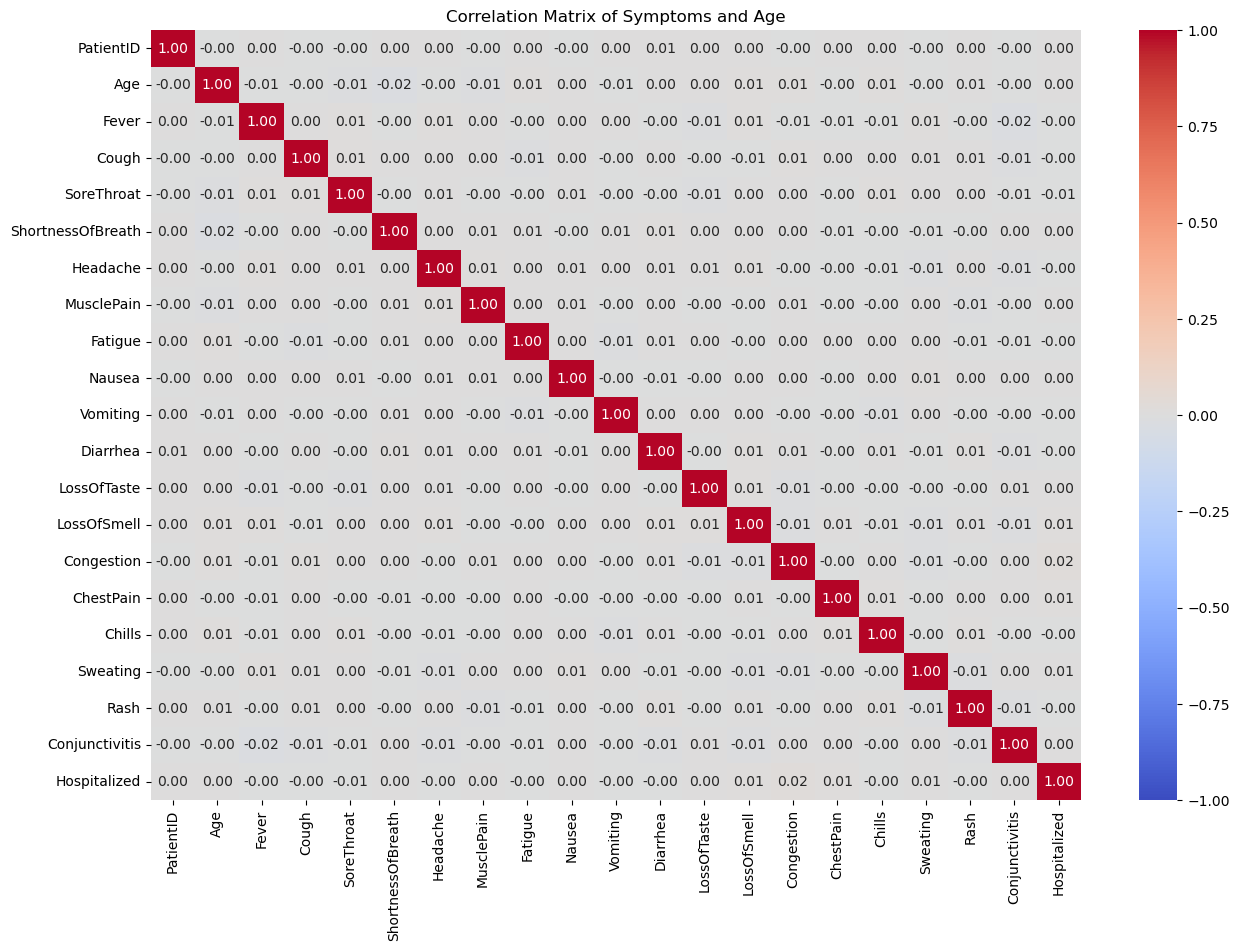

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('balanced_infectious_disease_dataset.xlsx')

# Convert binary categorical variables to numerical for correlation analysis
binary_columns = ['Fever', 'Cough', 'SoreThroat', 'ShortnessOfBreath', 'Headache', 'MusclePain', 
                  'Fatigue', 'Nausea', 'Vomiting', 'Diarrhea', 'LossOfTaste', 'LossOfSmell', 
                  'Congestion', 'ChestPain', 'Chills', 'Sweating', 'Rash', 'Conjunctivitis', 
                  'Hospitalized']

for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Symptoms and Age')
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1]
}
grid_search = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), X_processed, y_encoded, cv=5)
print("Cross-Validation Scores:", scores)


Cross-Validation Scores: [0.2535 0.246  0.256  0.239  0.2475]


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
data = pd.read_excel('balanced_infectious_disease_dataset.xlsx') 

# Drop the PatientID column
data = data.drop(columns=['PatientID'])

# Convert categorical columns to numerical values
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
    
# Save the preprocessed dataset to a CSV file
data.to_csv('original3_preprocessed_dataset.csv', index=False)
# Split the dataset into features and target
X = data.drop('Disease', axis=1)
y = data['Disease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoders['Disease'].classes_)

print("Accuracy Score:", accuracy)
print("\nClassification Report:\n", report)

# Print the original and preprocessed datasets
print("\nOriginal Dataset:")
print(data.head())

print("\nPreprocessed Dataset:")
print(pd.concat([X, y], axis=1).head())


Accuracy Score: 0.066325

Classification Report:
               precision    recall  f1-score   support

     Cholera       0.07      0.06      0.06     19936
    HIV/AIDS       0.07      0.06      0.07     20098
 Lassa fever       0.07      0.07      0.07     19915
     Malaria       0.07      0.07      0.07     20090
Tuberculosis       0.07      0.07      0.07     19831
Yellow fever       0.06      0.06      0.06     20130

    accuracy                           0.07    120000
   macro avg       0.07      0.07      0.07    120000
weighted avg       0.07      0.07      0.07    120000


Original Dataset:
   Age  Gender  Fever  Cough  SoreThroat  ShortnessOfBreath  Headache  \
0   64       1      1      0           1                  0         1   
1   59       1      1      1           1                  1         0   
2   27       1      0      1           0                  0         0   
3   24       1      1      1           0                  1         0   
4   55       0      1  

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
data = pd.read_excel('Dataset.xlsx') 

# Drop the PatientID column
data = data.drop(columns=['PatientID'])

# Convert categorical columns to numerical values
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
    
# Save the preprocessed dataset to a CSV file
data.to_csv('original3_preprocessed_dataset.csv', index=False)
# Split the dataset into features and target
X = data.drop('Disease', axis=1)
y = data['Disease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoders['Disease'].classes_)

print("Accuracy Score:", accuracy)
print("\nClassification Report:\n", report)

# Print the original and preprocessed datasets
print("\nOriginal Dataset:")
print(data.head())

print("\nPreprocessed Dataset:")
print(pd.concat([X, y], axis=1).head())


Accuracy Score: 0.19866148698026848

Classification Report:
                precision    recall  f1-score   support

     COVID-19       0.26      0.44      0.32      2054
      Cholera       0.12      0.13      0.12      2544
  Common Cold       0.28      0.46      0.35      2025
          HIV       0.07      0.01      0.01      1171
     HIV/AIDS       0.08      0.01      0.02      1394
  Hepatitis B       0.08      0.01      0.02      1426
    Influenza       0.26      0.48      0.34      2002
  Lassa fever       0.12      0.14      0.13      2462
      Malaria       0.13      0.13      0.13      2594
    Pneumonia       0.25      0.49      0.33      2017
          STD       0.05      0.01      0.01      1136
 Tuberculosis       0.13      0.12      0.12      2599
Typhoid fever       0.08      0.01      0.02      1391
 Yellow fever       0.05      0.00      0.01      1184

     accuracy                           0.20     25999
    macro avg       0.14      0.17      0.14     25999
 w

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load your dataset
data = pd.read_excel('Dataset.xlsx') 

# Drop the PatientID column
data = data.drop(columns=['PatientID'])

# Convert categorical columns to numerical values
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
    
# Save the preprocessed dataset to a CSV file
data.to_csv('original3_preprocessed_dataset.csv', index=False)

# Split the dataset into features and target
X = data.drop('Disease', axis=1)
y = data['Disease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
model.fit(X_train, y_train)

# Save the model as a joblib file
joblib_filename = 'xgboost_model4.joblib'
joblib.dump(model, joblib_filename)
joblib.dump(label_encoders, 'label_encoders.joblib')

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoders['Disease'].classes_)

print("Accuracy Score:", accuracy)
print("\nClassification Report:\n", report)

# Print the original and preprocessed datasets
print("\nOriginal Dataset:")
print(data.head())

print("\nPreprocessed Dataset:")
print(pd.concat([X, y], axis=1).head())


Accuracy Score: 0.19866148698026848

Classification Report:
                precision    recall  f1-score   support

     COVID-19       0.26      0.44      0.32      2054
      Cholera       0.12      0.13      0.12      2544
  Common Cold       0.28      0.46      0.35      2025
          HIV       0.07      0.01      0.01      1171
     HIV/AIDS       0.08      0.01      0.02      1394
  Hepatitis B       0.08      0.01      0.02      1426
    Influenza       0.26      0.48      0.34      2002
  Lassa fever       0.12      0.14      0.13      2462
      Malaria       0.13      0.13      0.13      2594
    Pneumonia       0.25      0.49      0.33      2017
          STD       0.05      0.01      0.01      1136
 Tuberculosis       0.13      0.12      0.12      2599
Typhoid fever       0.08      0.01      0.02      1391
 Yellow fever       0.05      0.00      0.01      1184

     accuracy                           0.20     25999
    macro avg       0.14      0.17      0.14     25999
 w

In [34]:
import pandas as pd
import xgboost as xgb
import joblib

# Assuming the trained model is saved as 'xgb_model.pkl'
model = joblib.load('xgboost_model4.joblib')

# Function to convert "Yes" or "No" to 1 or 0
def yes_no_to_numeric(value):
    return 1 if value.lower() == "yes" else 0

# Function to take user input, preprocess, and predict the disease
def predict_disease():
    while True:
        print("\nEnter the patient's information (type 'end' to stop):")

        age = input("Enter Age: ")
        if age.lower() == "end":
            break

        gender = input("Enter Gender (Male/Female): ")
        if gender.lower() == "end":
            break

        fever = input("Fever (Yes/No): ")
        if fever.lower() == "end":
            break

        cough = input("Cough (Yes/No): ")
        if cough.lower() == "end":
            break

        sore_throat = input("Sore Throat (Yes/No): ")
        if sore_throat.lower() == "end":
            break

        shortness_of_breath = input("Shortness of Breath (Yes/No): ")
        if shortness_of_breath.lower() == "end":
            break

        headache = input("Headache (Yes/No): ")
        if headache.lower() == "end":
            break

        muscle_pain = input("Muscle Pain (Yes/No): ")
        if muscle_pain.lower() == "end":
            break

        fatigue = input("Fatigue (Yes/No): ")
        if fatigue.lower() == "end":
            break

        nausea = input("Nausea (Yes/No): ")
        if nausea.lower() == "end":
            break

        vomiting = input("Vomiting (Yes/No): ")
        if vomiting.lower() == "end":
            break

        diarrhea = input("Diarrhea (Yes/No): ")
        if diarrhea.lower() == "end":
            break

        loss_of_taste = input("Loss of Taste (Yes/No): ")
        if loss_of_taste.lower() == "end":
            break

        loss_of_smell = input("Loss of Smell (Yes/No): ")
        if loss_of_smell.lower() == "end":
            break

        congestion = input("Congestion (Yes/No): ")
        if congestion.lower() == "end":
            break

        chest_pain = input("Chest Pain (Yes/No): ")
        if chest_pain.lower() == "end":
            break

        chills = input("Chills (Yes/No): ")
        if chills.lower() == "end":
            break

        sweating = input("Sweating (Yes/No): ")
        if sweating.lower() == "end":
            break

        rash = input("Rash (Yes/No): ")
        if rash.lower() == "end":
            break

        conjunctivitis = input("Conjunctivitis (Yes/No): ")
        if conjunctivitis.lower() == "end":
            break

        hospitalized = input("Hospitalized (Yes/No): ")
        if hospitalized.lower() == "end":
            break

        features = {
            "Age": int(age),
            "Gender": gender,
            "Fever": yes_no_to_numeric(fever),
            "Cough": yes_no_to_numeric(cough),
            "SoreThroat": yes_no_to_numeric(sore_throat),
            "ShortnessOfBreath": yes_no_to_numeric(shortness_of_breath),
            "Headache": yes_no_to_numeric(headache),
            "MusclePain": yes_no_to_numeric(muscle_pain),
            "Fatigue": yes_no_to_numeric(fatigue),
            "Nausea": yes_no_to_numeric(nausea),
            "Vomiting": yes_no_to_numeric(vomiting),
            "Diarrhea": yes_no_to_numeric(diarrhea),
            "LossOfTaste": yes_no_to_numeric(loss_of_taste),
            "LossOfSmell": yes_no_to_numeric(loss_of_smell),
            "Congestion": yes_no_to_numeric(congestion),
            "ChestPain": yes_no_to_numeric(chest_pain),
            "Chills": yes_no_to_numeric(chills),
            "Sweating": yes_no_to_numeric(sweating),
            "Rash": yes_no_to_numeric(rash),
            "Conjunctivitis": yes_no_to_numeric(conjunctivitis),
            "Hospitalized": yes_no_to_numeric(hospitalized)
        }

        # Check if all symptoms are "No"
        if all(value == 0 for key, value in features.items() if key not in ['Age', 'Gender']):
            print("You have selected 'No' for all symptoms. You do not seem to have any disease. Please select your symptoms accurately for better prediction.")
            continue

        # Convert the input to a DataFrame
        input_data = pd.DataFrame([features])

        # Convert gender to numeric
        input_data['Gender'] = input_data['Gender'].map({'Male': 1, 'Female': 0})

        # Predict using the trained model
        prediction = model.predict(input_data)
        disease_map = {0: "Influenza", 1: "COVID-19", 2: "Common Cold", 3: "Pneumonia",4:"Malaria", 5:"Lassa fever",6: "Yellow fever",7:"Cholera",8:"Tuberculosis",9:"HIV",10:"STD",11:"HIV/AIDS",12:"Typhoid fever",13:"Hepatitis B"}

        print(f"The predicted disease is: {disease_map[prediction[0]]}")

# Call the function to take input and predict
predict_disease()



Enter the patient's information (type 'end' to stop):
Enter Age: 54
Enter Gender (Male/Female): male
Fever (Yes/No): yes
Cough (Yes/No): no
Sore Throat (Yes/No): no
Shortness of Breath (Yes/No): yes
Headache (Yes/No): no
Muscle Pain (Yes/No): yes
Fatigue (Yes/No): no
Nausea (Yes/No): yes
Vomiting (Yes/No): no
Diarrhea (Yes/No): yes
Loss of Taste (Yes/No): no
Loss of Smell (Yes/No): yes
Congestion (Yes/No): no
Chest Pain (Yes/No): yes
Chills (Yes/No): no
Sweating (Yes/No): yes
Rash (Yes/No): no
Conjunctivitis (Yes/No): yes
Hospitalized (Yes/No): no
The predicted disease is: Influenza

Enter the patient's information (type 'end' to stop):
Enter Age: 66
Enter Gender (Male/Female): male
Fever (Yes/No): yes
Cough (Yes/No): no
Sore Throat (Yes/No): yes
Shortness of Breath (Yes/No): no
Headache (Yes/No): no
Muscle Pain (Yes/No): yes
Fatigue (Yes/No): no
Nausea (Yes/No): yes
Vomiting (Yes/No): no
Diarrhea (Yes/No): yes
Loss of Taste (Yes/No): no
Loss of Smell (Yes/No): yes
Congestion (Yes/No)

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import joblib

# Load your dataset
data = pd.read_excel('Dataset.xlsx') 

# Print all unique disease names
unique_diseases = data['Disease'].unique()
print("All Disease Names in the Dataset:", unique_diseases)

All Disease Names in the Dataset: ['Influenza' 'COVID-19' 'Common Cold' 'Pneumonia' 'Malaria' 'Lassa fever'
 'Yellow fever' 'Cholera' 'Tuberculosis' 'HIV' 'STD' 'HIV/AIDS'
 'Typhoid fever' 'Hepatitis B']


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load your dataset
data = pd.read_excel('Dataset.xlsx')

# Drop the PatientID column
data = data.drop(columns=['PatientID'])

# Convert categorical columns to numerical values
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Save the label encoders
joblib.dump(label_encoders, 'label_encoders3.joblib')

# Save the preprocessed dataset to a CSV file
data.to_csv('preprocessed_dataset.csv', index=False)

# Split the dataset into features and target
X = data.drop('Disease', axis=1)
y = data['Disease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
model.fit(X_train, y_train)

# Save the model as a joblib file
joblib_filename = 'xgboost_model7.joblib'
joblib.dump(model, joblib_filename)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoders['Disease'].classes_)

print("Accuracy Score:", accuracy)
print("\nClassification Report:\n", report)

# Print the original and preprocessed datasets
print("\nOriginal Dataset:")
print(data.head())

print("\nPreprocessed Dataset:")
print(pd.concat([X, y], axis=1).head())


Accuracy Score: 0.19866148698026848

Classification Report:
                precision    recall  f1-score   support

     COVID-19       0.26      0.44      0.32      2054
      Cholera       0.12      0.13      0.12      2544
  Common Cold       0.28      0.46      0.35      2025
          HIV       0.07      0.01      0.01      1171
     HIV/AIDS       0.08      0.01      0.02      1394
  Hepatitis B       0.08      0.01      0.02      1426
    Influenza       0.26      0.48      0.34      2002
  Lassa fever       0.12      0.14      0.13      2462
      Malaria       0.13      0.13      0.13      2594
    Pneumonia       0.25      0.49      0.33      2017
          STD       0.05      0.01      0.01      1136
 Tuberculosis       0.13      0.12      0.12      2599
Typhoid fever       0.08      0.01      0.02      1391
 Yellow fever       0.05      0.00      0.01      1184

     accuracy                           0.20     25999
    macro avg       0.14      0.17      0.14     25999
 w

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load your dataset
data = pd.read_excel('Dataset.xlsx')

# Drop the PatientID column
data = data.drop(columns=['PatientID'])

# Convert categorical columns to numerical values
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Save the label encoders
joblib.dump(label_encoders, 'label_encoders2.joblib')

# Save the preprocessed dataset to a CSV file
data.to_csv('preprocessed_dataset.csv', index=False)

# Split the dataset into features and target
X = data.drop('Disease', axis=1)
y = data['Disease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
model.fit(X_train, y_train)

# Save the model as a joblib file
joblib_filename = 'xgboost_model6.joblib'
joblib.dump(model, joblib_filename)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoders['Disease'].classes_)

print("Accuracy Score:", accuracy)
print("\nClassification Report:\n", report)

# Print the original and preprocessed datasets
print("\nOriginal Dataset:")
print(data.head())

print("\nPreprocessed Dataset:")
print(pd.concat([X, y], axis=1).head())

# Print label encoders for verification
for column, le in label_encoders.items():
    print(f"Column: {column}, Classes: {le.classes_}")


Accuracy Score: 0.19866148698026848

Classification Report:
                precision    recall  f1-score   support

     COVID-19       0.26      0.44      0.32      2054
      Cholera       0.12      0.13      0.12      2544
  Common Cold       0.28      0.46      0.35      2025
          HIV       0.07      0.01      0.01      1171
     HIV/AIDS       0.08      0.01      0.02      1394
  Hepatitis B       0.08      0.01      0.02      1426
    Influenza       0.26      0.48      0.34      2002
  Lassa fever       0.12      0.14      0.13      2462
      Malaria       0.13      0.13      0.13      2594
    Pneumonia       0.25      0.49      0.33      2017
          STD       0.05      0.01      0.01      1136
 Tuberculosis       0.13      0.12      0.12      2599
Typhoid fever       0.08      0.01      0.02      1391
 Yellow fever       0.05      0.00      0.01      1184

     accuracy                           0.20     25999
    macro avg       0.14      0.17      0.14     25999
 w